In [1]:
import requests
import datetime
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
# Pretty print the JSON
import uuid
from IPython.display import display_javascript, display_html, display
import json

class RenderJSON(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json_data
        self.uuid = str(uuid.uuid4())

    def _ipython_display_(self):
        display_html('<div id="{}" style="height: 600px; width:100%;"></div>'.format(self.uuid), raw=True)
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
        document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)

# CryptoCompare API - August 2017

## Current Price

In [4]:
def price(symbol, comparison_symbols=['USD'], exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price?fsym={}&tsyms={}'\
            .format(symbol.upper(), ','.join(comparison_symbols).upper())
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()
    return data

In [5]:
price('LTC', exchange='Coinbase')

{'USD': 59.57}

In [6]:
price('NEO', ['BTC', 'ETH', 'USD'])

{'BTC': 0.00894, 'ETH': 0.1127, 'USD': 37.3}

## Daily Historical Price

In [7]:
def daily_price_historical(symbol, comparison_symbol, limit=1, aggregate=1, exchange='', allData='true'):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}&allData={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate, allData)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [20]:
df = daily_price_historical('BTC', 'USD')
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() - df.timestamp.min()))
df.head()

Max length = 2600
Max time = 2599 days 00:00:00


,close,high,low,open,time,volumefrom,volumeto,timestamp
0,0.04951,0.04951,0.04951,0.04951,1279324800,20.00,0.9902,2010-07-16 17:00:00
1,0.08584,0.08585,0.05941,0.04951,1279411200,75.01,5.0900,2010-07-17 17:00:00
2,0.08080,0.09307,0.07723,0.08584,1279497600,574.00,49.6600,2010-07-18 17:00:00
3,0.07474,0.08181,0.07426,0.08080,1279584000,262.00,20.5900,2010-07-19 17:00:00
4,0.07921,0.07921,0.06634,0.07474,1279670400,575.00,42.2600,2010-07-20 17:00:00


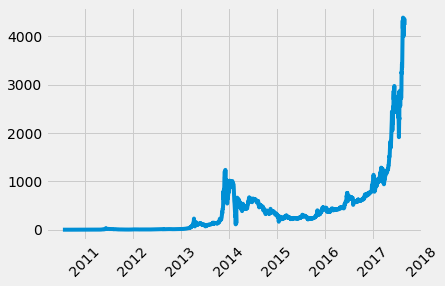

In [19]:
plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()

## Historical Hourly Price

In [9]:
def hourly_price_historical(symbol, comparison_symbol, limit, aggregate, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histohour?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

Max length = 2001
Max time = 83 days 08:00:00


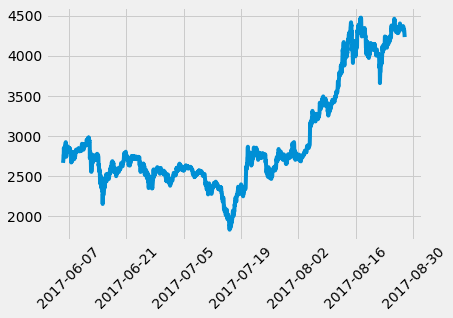

In [10]:
time_delta = 1 # Bar width in hours
df = hourly_price_historical('BTC', 'USD', 9999, time_delta)
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() - df.timestamp.min()))

plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()

Max length = 84
Max time = 83 days 00:00:00


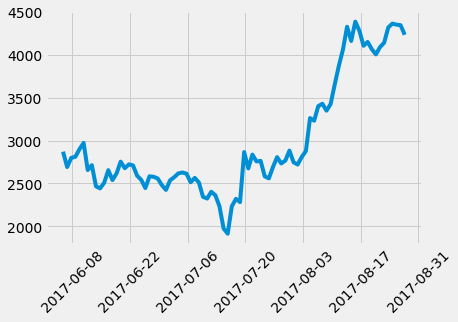

In [11]:
time_delta = 24 # Bar width in hours
df = hourly_price_historical('BTC', 'USD', 9999, time_delta)
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() - df.timestamp.min()))

plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()

## Historical Price by Minute

In [12]:
def minute_price_historical(symbol, comparison_symbol, limit, aggregate, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histominute?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

Max length = 2001
Max time = 1 days 09:20:00


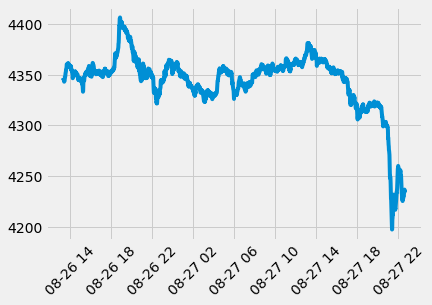

In [13]:
time_delta = 1 # Bar width in minutes
df = minute_price_historical('BTC', 'USD', 9999, time_delta)
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() - df.timestamp.min()))

plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()

## Coin List

In [14]:
def coin_list():
    url = 'https://www.cryptocompare.com/api/data/coinlist/'
    page = requests.get(url)
    data = page.json()['Data']
    return data

In [15]:
data = coin_list()
RenderJSON(data)

In [21]:
print(len(data))

1473


In [16]:
symbol_id_dict = {symb: int(d['Id']) for symb, d in data.items()}

In [17]:
print(json.dumps(symbol_id_dict, indent=2))

{
  "ANNC": 4329,
  "AEC": 20986,
  "XBC": 5391,
  "RT2": 4595,
  "NEBU": 20980,
  "SEN": 28778,
  "ELS": 42685,
  "OMC": 5365,
  "COE": 201701,
  "GHC": 5336,
  "365": 33639,
  "ADST": 194530,
  "VISIO": 62648,
  "TX": 13045,
  "DIGS": 12192,
  "ROS": 5380,
  "WAY": 27681,
  "REE": 22418,
  "NET*": 176669,
  "XID": 199026,
  "TPG": 32882,
  "BAC": 20348,
  "ODNT": 34847,
  "N7": 21017,
  "QBK": 5361,
  "KORE": 5318,
  "INFX": 20446,
  "MTL": 179164,
  "BLOCK": 5305,
  "TECH": 43595,
  "STEPS": 20724,
  "BTX": 198983,
  "FLO": 5325,
  "ACN": 35949,
  "GCN": 199065,
  "CYT": 21706,
  "PLR": 184298,
  "DETH": 40845,
  "DT": 3643,
  "ION": 20591,
  "BRIT": 182416,
  "IBANK": 23745,
  "SPKTR": 41871,
  "ZRC*": 5037,
  "AERO": 4324,
  "CAP": 4408,
  "MAPC": 12223,
  "ZENI": 56253,
  "YOC": 20691,
  "CMT": 22354,
  "LOOK": 36984,
  "GMC": 5388,
  "PTA": 39698,
  "XSP": 35816,
  "UTK": 236358,
  "BTCD": 4400,
  "ANTI": 20828,
  "BCF": 34854,
  "SUPER": 4615,
  "SOON": 5403,
  "PAYP": 40842,
 

## Live Coin Info

In [30]:
def coin_snapshot_full_by_id(symbol, symbol_id_dict={}):
    if not symbol_id_dict:
        symbol_id_dict = {
            'BTC': 1182,
            'ETH': 7605,
            'LTC': 3808
        }
    symbol_id = symbol_id_dict[symbol.upper()]
    url = 'https://www.cryptocompare.com/api/data/coinsnapshotfullbyid/?id={}'\
            .format(symbol_id)
    page = requests.get(url)
    data = page.json()['Data']
    return data

In [33]:
data = coin_snapshot_full_by_id('ETH', symbol_id_dict)
RenderJSON(data)

In [ ]:
data = live_social_status('NEO', symbol_id_dict)
RenderJSON(data)

In [40]:
def live_social_status(symbol, symbol_id_dict={}):
    if not symbol_id_dict:
        symbol_id_dict = {
            'BTC': 1182,
            'ETH': 7605,
            'LTC': 3808
        }
    symbol_id = symbol_id_dict[symbol.upper()]
    url = 'https://www.cryptocompare.com/api/data/socialstats/?id={}'\
            .format(symbol_id)
    page = requests.get(url)
    data = page.json()['Data']
    return data

In [42]:
data = live_social_status('BTC', symbol_id_dict)
RenderJSON(data)